### This part is divided into Jump Detection and Jump stats part. While Lee-Mykland is more time changable comparing to other models, it is a perfect fit for Small-cap Stocks. I find that, after kicking small scale volatility out my the jump set, we get a dPIN Distribution.

# data Loading

In [3]:
sample_stocks = [
    'AAON', 'ABCB', 'ABM', 'ACAD', 'ACCO', 'ACHC', 'ACIW', 'ACLS', 'ADC', 'ADMA',
    'ADTN', 'ADUS', 'AEIS', 'AEO', 'AFG', 'AGYS', 'AGO', 'AIN', 'AIR', 'AIT',
    'AKRO', 'ALGM', 'ALGT', 'ALKS', 'ALRM', 'ALTR', 'AMBA', 'AMBC', 'AMBP', 'AMCX',
    'AMKR', 'AMN', 'AMPH', 'AMRC', 'AMWD', 'ANF', 'ANGO', 'ANIK', 'ANNX', 'AORT',
    'AOSL', 'APAM', 'APG', 'APLD', 'APOG', 'APPN', 'ARAY', 'ARCB', 'ARCO', 'AREN',
    'ARLO', 'ARMK', 'AROC', 'ARR', 'ASB', 'ASGN', 'ASIX', 'ASRT', 'ASTE', 'ASYS',
    'ATEA', 'ATEC', 'ATGE', 'ATKR', 'ATLO', 'ATNM', 'ATR', 'ATRC', 'ATRO', 'ATSG',
    'AVAV', 'AVDX', 'AVNS', 'AVO', 'AWR', 'AXL', 'AXTI', 'AYI', 'AZZ', 'BANC',
    'BANF', 'BAND', 'BCRX', 'BDC', 'BELFB', 'BFC', 'BHLB', 'BHR', 'BIG', 'BJRI',
    'BKU', 'BLD', 'BLKB', 'BLMN', 'BNED', 'BOOT', 'BOX', 'BPFH', 'BRC', 'BRKL',
    'BSET', 'BSIG', 'BWXT', 'BYD', 'CADE', 'CALM', 'CAMP', 'CASH', 'CASI', 'CASS',
    'CATO', 'CBRL', 'CCF', 'CCRN', 'CDE', 'CEIX', 'CENT', 'CENX', 'CFFN', 'CFR',
    'CHCO', 'CHCT', 'CHDN', 'CHEF', 'CHMG', 'CHRS', 'CHS', 'CHUY', 'CINF', 'CLDT',
    'CLFD', 'CLH', 'CLNE', 'CNMD', 'CNO', 'CNS', 'CNSL', 'CNX', 'COHU', 'COKE',
    'COLB', 'COLM', 'COMM', 'CONN', 'CORE', 'CORT', 'COST', 'CPK', 'CPRO', 'CPRX',
    'CPSI', 'CPT', 'CR', 'CRAI', 'CRDO', 'CREE', 'CRK', 'CRL', 'CRMT', 'CRNC',
    'CRNX', 'CRSR', 'CRTO', 'CRUS', 'CRVL', 'CSGS', 'CSII', 'CSL', 'CSWI', 'CTRE',
    'CTRN', 'CTS', 'CTSO', 'CUB', 'CUBI', 'CUE', 'CUTR', 'CVBF', 'CVCO', 'CVLG',
    'CVLT', 'CVLY', 'CVI', 'CW', 'CWEN', 'CWH', 'CWST', 'CWT', 'CXM', 'CXW',
    'CYRX', 'CYTK', 'DAVE', 'DAKT', 'DAN', 'DBI', 'DCT', 'DDS', 'DECK', 'DENN',
    'DFIN', 'DGII', 'DIN', 'DIOD', 'DJCO', 'DK', 'DLX', 'DMLP', 'DNOW', 'DNUT',
    'DOC', 'DOOR', 'DORM', 'DRH', 'DRI', 'DSP', 'DTC', 'DTI', 'DTM', 'DVAX',
    'DXC', 'DXCM', 'DXLG', 'DXPE', 'DY', 'EAT', 'EBC', 'EBF', 'EBIX', 'EBS',
    'ECPG', 'EDR', 'EEFT', 'EFC', 'EFOI', 'EGBN', 'EGP', 'EGRX', 'EGY', 'EHC',
    'EIG', 'ELF', 'ELME', 'EME', 'EML', 'ENOC', 'ENPH', 'ENS', 'ENSG', 'ENTA',
    'ENV', 'ENVA', 'EOLS', 'EPAC', 'EPM', 'EPRT', 'EQBK', 'EQC', 'ERIE', 'ESAB',
    'ESCA', 'ESE', 'ESNT', 'EVRI', 'EVTC', 'EWBC', 'EXTN', 'EXTR', 'EYE', 'EZPW',
    'FAF', 'FARM', 'FBK', 'FBNC', 'FBP', 'FCFS', 'FCN', 'FCPT', 'FDP', 'FELE',
    'FIBK', 'FICO', 'FIGS', 'FINW', 'FISI', 'FITB', 'FIVE', 'FIVN', 'FIZZ', 'FL',
    'FLGT', 'FLIC', 'FLO', 'FLOW', 'FLR', 'FLS', 'FLWS', 'FMAO', 'FMNB', 'FNCB',
    'FNHC', 'FNP', 'FNSV', 'FOR', 'FORR', 'FOSL', 'FPI', 'FPRX', 'FR', 'FRME',
    'FRO', 'FRPH', 'FRST', 'FSS', 'FTAI', 'FTDR', 'FULT', 'FWRD', 'G', 'GABC',
    'GAIA', 'GALT', 'GAMB', 'GATX', 'GBCI', 'GBX', 'GCI', 'GDEN', 'GDRX', 'GENC',
    'GENT', 'GEO', 'GERN', 'GES', 'GFF', 'GFI', 'GGG', 'GHL', 'GH', 'GIII',
    'GILD', 'GIS', 'GLDD', 'GLPI', 'GLRE', 'GLT', 'GME', 'GMED', 'GMS', 'GNRC',
    'GNTX', 'GNW', 'GOGO', 'GOL', 'GOLF', 'GOOD', 'GOOS', 'GOSS', 'GPAQ', 'GPK',
    'GPMT', 'GPN', 'GPRE', 'GPRO', 'GPS', 'GRBK', 'GRC', 'GRPN', 'GRTS', 'GSBC',
    'GSHD', 'GSIT', 'GSM', 'GT', 'GTY', 'GVA', 'GWB', 'GWR', 'GWW', 'H',
    'HAE', 'HAIN', 'HALO', 'HASI', 'HAYN', 'HBB', 'HBCP', 'HBI', 'HBMD', 'HBNC',
    'HCA', 'HCC', 'HCI', 'HCSG', 'HDLY', 'HE', 'HEES', 'HEI', 'HELE', 'HFWA',
    'HGV', 'HHC', 'HI', 'HIBB', 'HIG', 'HIW', 'HL', 'HLF', 'HLI', 'HLIT',
    'HLX', 'HMN', 'HMST', 'HMY', 'HNI', 'HOFT', 'HOLI', 'HOPE', 'HP', 'HPP',
    'HPQ', 'HR', 'HRB', 'HRI', 'HRL', 'HRMY', 'HRT', 'HRTG', 'HSIC', 'HSII',
    'HSTM', 'HSY', 'HT', 'HTH', 'HTLD', 'HUBB', 'HUBS', 'HUM', 'HUN', 'HURC',
    'HVT', 'HWBK', 'HWC', 'HWKN', 'HX', 'HY', 'HYLN', 'HZO', 'IART', 'IBOC',
    'IBP', 'ICAD', 'ICFI', 'ICHR', 'ICL', 'ICUI', 'IDA', 'IDCC', 'IDXX', 'IESC',
    'IEX', 'IFF', 'IGT', 'IHC', 'IIVI', 'ILLM', 'ILMN', 'IMKTA', 'IMXI', 'INDB',
    'INFA', 'INGN', 'INMD', 'INSP', 'INST', 'INTU', 'INVA', 'INVH', 'IONQ', 'IOSP'
]
# There are too much and my computer really sucks, so a just use a small proportion of this dataset, if possible, you can try to use the whole set. Definitely, you can get a more precise result.

# Jump Detection

/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_55309/4208304082.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('HLIT',interval='1h',start='2024-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Lee-Mykland detected 15 jumps.


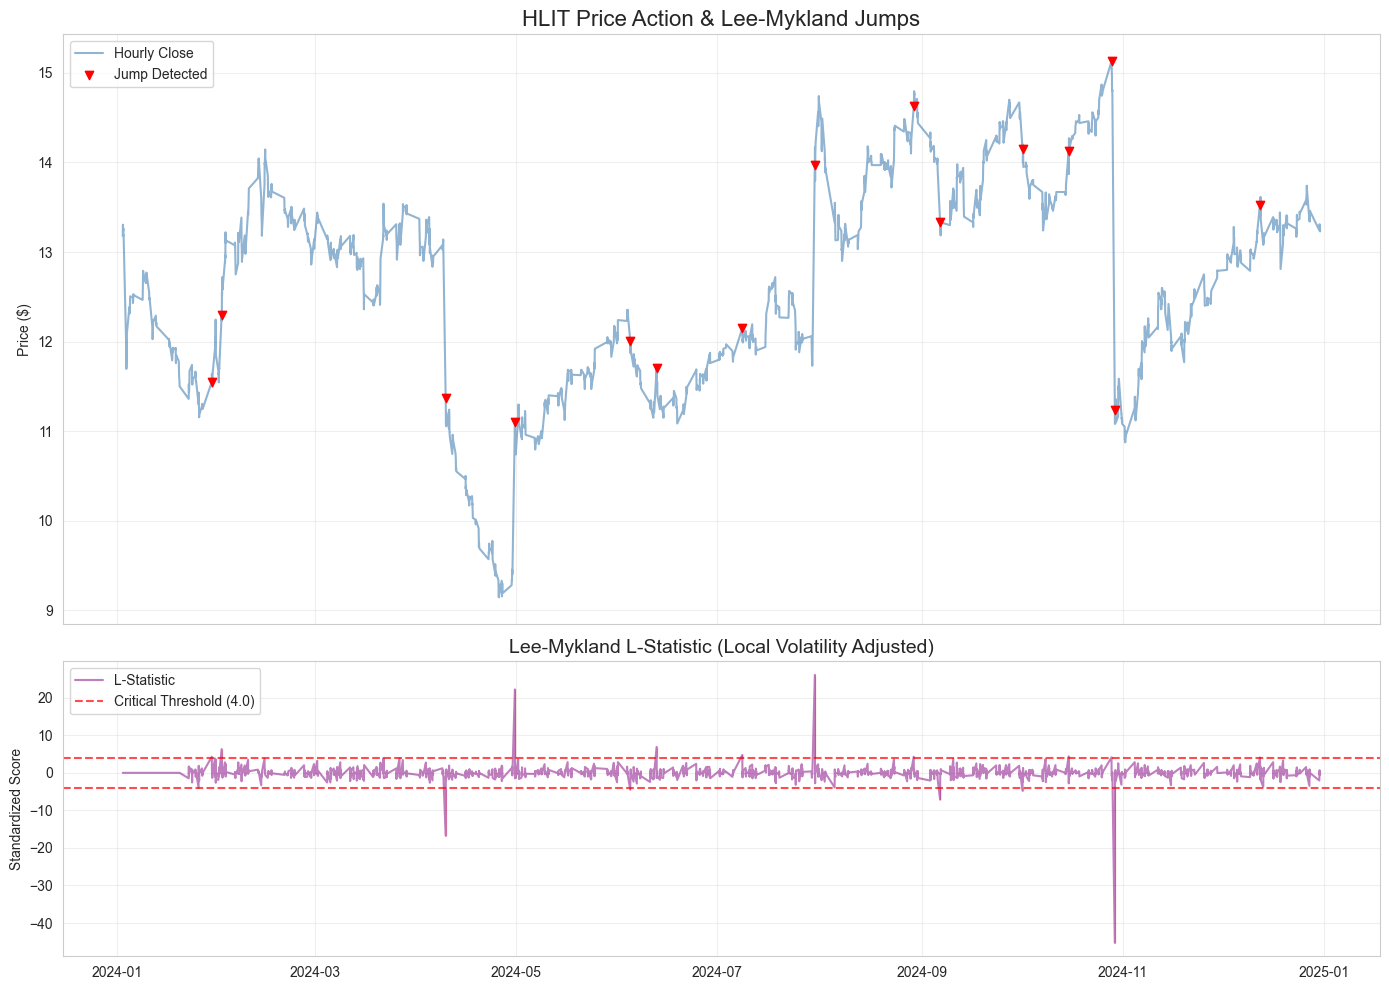

Price,Close,High,Low,Open,Volume,Returns,Local_Vol,L_statistic,Is_Jump
Ticker,HLIT,HLIT,HLIT,HLIT,HLIT,,,,
Datetime,,,,,,,,,
2024-01-29 14:30:00+00:00,11.5488,11.6099,11.2750,11.290,451111,0.026213,0.006112,4.288777,True
2024-02-01 14:30:00+00:00,12.2965,12.3000,11.7900,11.900,596911,0.050581,0.008015,6.311048,True
2024-04-09 13:30:00+00:00,11.3700,12.3600,11.2501,12.220,1167078,-0.144683,0.008632,-16.761712,True
2024-04-30 13:30:00+00:00,11.1012,12.1100,10.8405,11.685,2690623,0.166344,0.007490,22.209421,True
2024-06-04 13:30:00+00:00,12.0100,12.2200,11.9850,12.200,124548,-0.024672,0.005548,-4.447320,True
2024-06-12 13:30:00+00:00,11.7000,11.7050,11.3100,11.420,132649,0.042783,0.006187,6.915457,True
2024-07-08 13:30:00+00:00,12.1500,12.1850,11.9300,11.930,345486,0.026690,0.005594,4.771140,True
2024-07-30 13:30:00+00:00,13.9700,15.3100,13.8708,14.740,2941171,0.173485,0.006649,26.092955,True


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import yfinance as yf
df=yf.download('HLIT',interval='1h',start='2024-01-01',end='2024-12-31')
import pandas as pd
import numpy as np
import scipy.stats as stats

def lee_mykland_test(df, column='Close', window=90):

    data = df.copy()
    data['Returns'] = np.log(data[column] / data[column].shift(1))

    def calculate_bv(series):
        abs_ret = np.abs(series)
        bv_terms = abs_ret * abs_ret.shift(1)
        return np.sqrt((np.pi / 2) * bv_terms.rolling(window=window).mean())

    data['Local_Vol'] = calculate_bv(data['Returns'])

    data['L_statistic'] = data['Returns'] / data['Local_Vol']


    n = len(data)
    c = np.sqrt(2 * np.log(n)) / 0.8
    threshold = (np.sqrt(2 * np.log(n)) - (np.log(np.log(n)) + np.log(4 * np.pi)) / (2 * np.sqrt(2 * np.log(n))))


    data['Is_Jump'] = np.abs(data['L_statistic']) > 4

    return data.fillna(0)

df_results = lee_mykland_test(df)


jump_count = df_results['Is_Jump'].sum()
print(f"Lee-Mykland detected {jump_count} jumps.")


import matplotlib.pyplot as plt

def plot_lee_mykland(df_results, ticker='HLIT'):

    jumps = df_results[df_results['Is_Jump'] == True]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                                   gridspec_kw={'height_ratios': [2, 1]})


    ax1.plot(df_results.index, df_results['Close'], color='steelblue', alpha=0.6, label='Hourly Close')
    ax1.scatter(jumps.index, jumps['Close'], color='red', marker='v', label='Jump Detected', zorder=5)
    ax1.set_title(f'{ticker} Price Action & Lee-Mykland Jumps', fontsize=16)
    ax1.set_ylabel('Price ($)')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)


    ax2.plot(df_results.index, df_results['L_statistic'], color='purple', alpha=0.5, label='L-Statistic')


    ax2.axhline(4.0, color='red', linestyle='--', alpha=0.7, label='Critical Threshold (4.0)')
    ax2.axhline(-4.0, color='red', linestyle='--', alpha=0.7)


    ax2.fill_between(df_results.index, df_results['L_statistic'], 4.0,
                     where=(df_results['L_statistic'] > 4.0), color='red', alpha=0.3)
    ax2.fill_between(df_results.index, df_results['L_statistic'], -4.0,
                     where=(df_results['L_statistic'] < -4.0), color='red', alpha=0.3)

    ax2.set_title('Lee-Mykland L-Statistic (Local Volatility Adjusted)', fontsize=14)
    ax2.set_ylabel('Standardized Score')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    return jumps

jumps_data=plot_lee_mykland(df_results, ticker='HLIT')
display(jumps_data)

# Jump Statistics and Distribution

/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_55309/725573718.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval='1h', start=start, end=end, progress=False)
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_55309/725573718.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval='1h', start=start, end=end, progress=False)
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_55309/725573718.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval='1h', start=start, end=end, progress=False)
/var/folders/th/bbk28r3j6772whp0nbk8gcmh0000gn/T/ipykernel_55309/725573718.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval='1h', start=start, end=end, progress=False)
/var/folders/th/bbk28r3j6772whp0nbk8gcmh


--- Jump Size Statistics ---
Mean Jump Size (%): 0.4120
Median Jump Size (%): 1.4951
Std Dev (%): 8.9116
Skewness: 8.4345
Kurtosis: 210.9535
Max Positive Jump (%): 245.6140
Max Negative Jump (%): -31.9650
Total Jumps Detected: 2868.0000


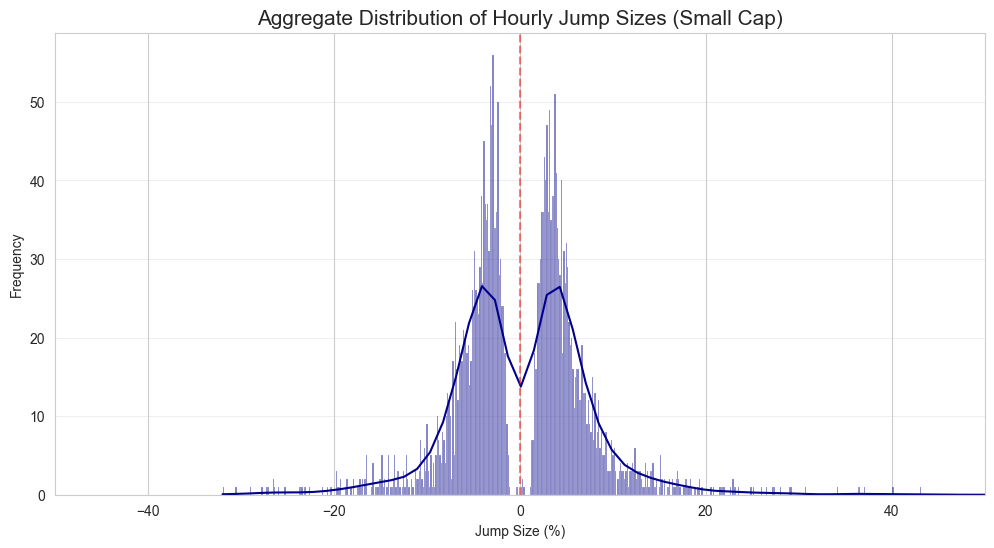

Price,Jump_Size_Pct,Ticker
Ticker,,
Datetime,,
2024-01-22 14:30:00+00:00,2.261730,AAON
2024-01-30 16:30:00+00:00,1.740971,AAON
2024-02-05 14:30:00+00:00,-3.137794,AAON
2024-02-08 14:30:00+00:00,4.026272,AAON
2024-02-13 14:30:00+00:00,-3.612701,AAON
2024-02-29 14:30:00+00:00,-3.070728,AAON
2024-04-02 13:30:00+00:00,-2.692258,AAON
2024-04-09 17:30:00+00:00,-3.195899,AAON


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

def lee_mykland_test(df, column='Close', window=90):
    data = df.copy()
    data['Returns'] = np.log(data[column] / data[column].shift(1))


    abs_ret = np.abs(data['Returns'])
    bv_terms = abs_ret * abs_ret.shift(1)
    data['Local_Vol'] = np.sqrt((np.pi / 2) * bv_terms.rolling(window=window).mean())

    data['L_statistic'] = data['Returns'] / data['Local_Vol']
    data['Is_Jump'] = np.abs(data['L_statistic']) > 4.0


    data['Jump_Size_Pct'] = (np.exp(data['Returns']) - 1) * 100
    return data.dropna()

def batch_process_jumps(tickers, start='2024-01-01', end='2025-12-17'):
    all_jumps = []

    print(f"Downloading and processing {len(tickers)} tickers...")
    for ticker in tickers:
        try:
            df = yf.download(ticker, interval='1h', start=start, end=end, progress=False)
            if df.empty: continue

            results = lee_mykland_test(df)
            jump_only = results[results['Is_Jump'] == True][['Jump_Size_Pct']]
            jump_only['Ticker'] = ticker
            all_jumps.append(jump_only)
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    return pd.concat(all_jumps)


sample_stocks = ['AAON', 'ABCB', 'ABM', 'ACAD', 'ACCO', 'ACGL', 'ACHC', 'ACIW', 'ACLS', 'ADC',
    'ADMA', 'ADTN', 'ADUS', 'AEIS', 'AEO', 'AFG', 'AGYS', 'AGO', 'AIN', 'AIR',
    'AIT', 'AJG', 'AKRO', 'AL', 'ALB', 'ALGM', 'ALGT', 'ALKS', 'ALRM', 'ALTR',
    'AMBA', 'AMBC', 'AMBP', 'AMC', 'AMCX', 'AMKR', 'AMN', 'AMPH', 'AMRC', 'AMWD',
    'ANF', 'ANGO', 'ANIK', 'ANNX', 'AORT', 'AOSL', 'APAM', 'APG', 'APLD', 'APOG',
    'APPN', 'ARAY', 'ARCB', 'ARCO', 'AREN', 'ARGO', 'ARLO', 'ARMK', 'AROC', 'ARR',
    'ASB', 'ASGN', 'ASIX', 'ASRT', 'ASTE', 'ASYS', 'ATEA', 'ATEC', 'ATGE', 'ATKR']
jump_df = batch_process_jumps(sample_stocks)


stats_summary = {
    'Mean Jump Size (%)': jump_df['Jump_Size_Pct'].mean(),
    'Median Jump Size (%)': jump_df['Jump_Size_Pct'].median(),
    'Std Dev (%)': jump_df['Jump_Size_Pct'].std(),
    'Skewness': stats.skew(jump_df['Jump_Size_Pct']),
    'Kurtosis': stats.kurtosis(jump_df['Jump_Size_Pct']),
    'Max Positive Jump (%)': jump_df['Jump_Size_Pct'].max(),
    'Max Negative Jump (%)': jump_df['Jump_Size_Pct'].min(),
    'Total Jumps Detected': len(jump_df)
}

print("\n--- Jump Size Statistics ---")
for k, v in stats_summary.items():
    print(f"{k}: {v:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.xlim(-50, 50)
sns.histplot(jump_df['Jump_Size_Pct'], kde=True, bins=2000, color='darkblue')
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Aggregate Distribution of Hourly Jump Sizes (Small Cap)', fontsize=15)
plt.xlabel('Jump Size (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


display(jump_df.head(10))